In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv("Heart Disease Dataset.csv")

In [6]:
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
df.shape

(918, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [9]:
df['HeartDisease'].value_counts()

,count
HeartDisease,
1,508
0,410


In [10]:
df.describe()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [11]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [12]:
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns

categorical_cols, numerical_cols

(Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object'),
 Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object'))

In [13]:
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [16]:
X_train.shape, X_test.shape


((734, 15), (184, 15))

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [18]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [19]:
y_pred_log = log_model.predict(X_test)

In [20]:
accuracy_score(y_test, y_pred_log)

0.8858695652173914

In [21]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87        82
           1       0.87      0.93      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



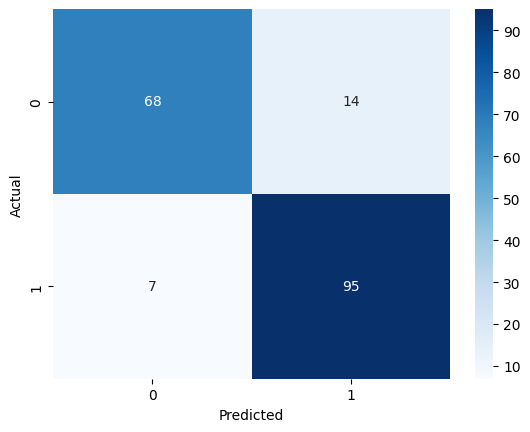

In [22]:
cm = confusion_matrix(y_test, y_pred_log)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [25]:
y_pred_rf = rf_model.predict(X_test)

In [26]:
accuracy_score(y_test, y_pred_rf)

0.875

In [27]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86        82
           1       0.88      0.89      0.89       102

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.88      0.87       184



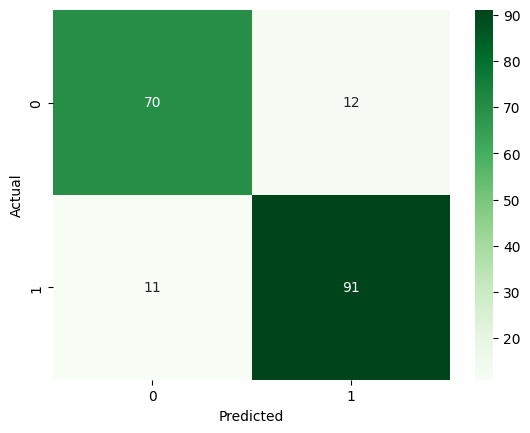

In [28]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [29]:
feature_importance = pd.Series(
    rf_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance.head(10)

,0
ST_Slope_Up,0.163153
MaxHR,0.119229
ST_Slope_Flat,0.113410
Cholesterol,0.107431
Oldpeak,0.099216
ExerciseAngina_Y,0.086208
Age,0.079529
RestingBP,0.071384
ChestPainType_ATA,0.036362
Sex_M,0.033044


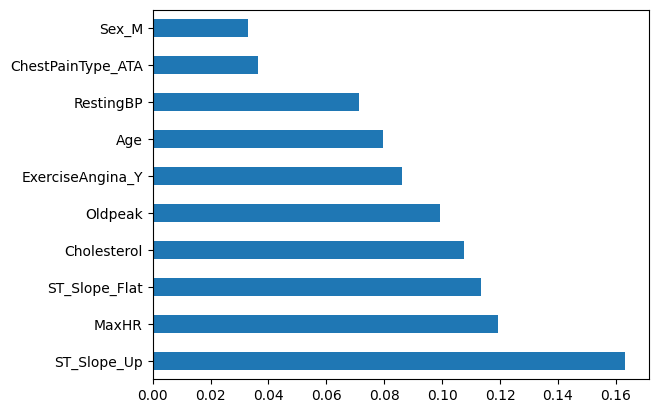

In [30]:
feature_importance.head(10).plot(kind='barh')
plt.show()


In [31]:
from sklearn.metrics import accuracy_score

# Accuracy Logistic Regression
log_acc = accuracy_score(y_test, y_pred_log)

# Accuracy Random Forest
rf_acc = accuracy_score(y_test, y_pred_rf)

print("Logistic Regression Accuracy:", round(log_acc, 4))
print("Random Forest Accuracy:", round(rf_acc, 4))


Logistic Regression Accuracy: 0.8859
Random Forest Accuracy: 0.875


In [32]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "Accuracy": [log_acc, rf_acc]
})

results


,Model,Accuracy
0,Logistic Regression,0.88587
1,Random Forest,0.87500


In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.86      0.85      0.86        82
           1       0.88      0.89      0.89       102

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.88      0.87       184



In [34]:
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=8,
    min_samples_split=5,
    random_state=42
)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

accuracy_score(y_test, y_pred_rf)


0.875

In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [36]:
model = Sequential()

# Input + Hidden Layer
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))

# Hidden Layer
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))

# Output Layer
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [38]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.5075 - loss: 0.7712 - val_accuracy: 0.6327 - val_loss: 0.6507
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5890 - loss: 0.6511 - val_accuracy: 0.7755 - val_loss: 0.5799
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6365 - loss: 0.5866 - val_accuracy: 0.7959 - val_loss: 0.5401
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7591 - loss: 0.5261 - val_accuracy: 0.7959 - val_loss: 0.5120
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7358 - loss: 0.5385 - val_accuracy: 0.7823 - val_loss: 0.4942
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7616 - loss: 0.4825 - val_accuracy: 0.7891 - val_loss: 0.4805
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7915 - loss: 0.4802 - val_accuracy: 0.7891 - val_loss: 0.4710
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8131 - loss: 0.4329 - val_accuracy: 0.7959 - v

In [39]:
dl_loss, dl_acc = model.evaluate(X_test, y_test, verbose=0)

print("Deep Learning Accuracy:", round(dl_acc, 4))


Deep Learning Accuracy: 0.8804


In [40]:
y_pred_dl = (model.predict(X_test) > 0.5).astype(int)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_dl))


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        82
           1       0.87      0.92      0.90       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



In [41]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "Neural Network"],
    "Accuracy": [log_acc, rf_acc, dl_acc]
})

results


,Model,Accuracy
0,Logistic Regression,0.885870
1,Random Forest,0.875000
2,Neural Network,0.880435
